In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten , BatchNormalization
from keras.layers import Conv2D, MaxPooling2D , AveragePooling2D,GlobalAveragePooling2D
from keras import models, layers
from keras.layers import LSTM,TimeDistributed
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_path = "/Users/phongminh/IE103Lab/Data_Malware/Data_Train"
val_path = "/Users/phongminh/IE103Lab/Data_Malware/Data_Val"
test_path = "/Users/phongminh/IE103Lab/Data_Malware/Data_Test"

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 2582 files belonging to 2 classes.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 310 files belonging to 2 classes.


In [12]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 310 files belonging to 2 classes.


In [13]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
def malware_model(width, height):
    base_model = MobileNetV2(input_shape=(width, height, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    return model


In [14]:
model=malware_model(224 , 224)

In [15]:
datagen = ImageDataGenerator(rotation_range=10,  
                         zoom_range = 0.1, 
                         width_shift_range=0.1,  
                         height_shift_range=0.1, 
                         rescale=1.0/255.0)

augmented_train_ds = datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

augmented_val_ds = datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

augmented_test_ds = datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Found 2582 images belonging to 2 classes.
Found 310 images belonging to 2 classes.
Found 310 images belonging to 2 classes.


In [16]:
model_fit = model.fit(augmented_train_ds, epochs=50, batch_size=32, validation_data=augmented_val_ds, callbacks=[early_stopping], verbose=1)

Epoch 1/50


2023-06-02 01:03:16.016887: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


81/81 [==============================] - ETA: 0s - loss: 0.8408 - accuracy: 0.5658

2023-06-02 01:05:01.623343: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


81/81 [==============================] - 120s 1s/step - loss: 0.8408 - accuracy: 0.5658 - val_loss: 0.6363 - val_accuracy: 0.6194
Epoch 2/50
81/81 [==============================] - 111s 1s/step - loss: 0.6576 - accuracy: 0.5914 - val_loss: 0.6402 - val_accuracy: 0.6129
Epoch 3/50
81/81 [==============================] - 110s 1s/step - loss: 0.6555 - accuracy: 0.5926 - val_loss: 0.6394 - val_accuracy: 0.5935
Epoch 4/50
81/81 [==============================] - 115s 1s/step - loss: 0.6436 - accuracy: 0.6158 - val_loss: 0.6313 - val_accuracy: 0.6355
Epoch 5/50
81/81 [==============================] - 114s 1s/step - loss: 0.6352 - accuracy: 0.6150 - val_loss: 0.6198 - val_accuracy: 0.6710
Epoch 6/50
81/81 [==============================] - 96s 1s/step - loss: 0.6251 - accuracy: 0.6305 - val_loss: 0.6151 - val_accuracy: 0.6581
Epoch 7/50
81/81 [==============================] - 54s 666ms/step - loss: 0.6146 - accuracy: 0.6379 - val_loss: 0.6122 - val_accuracy: 0.6742
Epoch 8/50
81/81 [=====

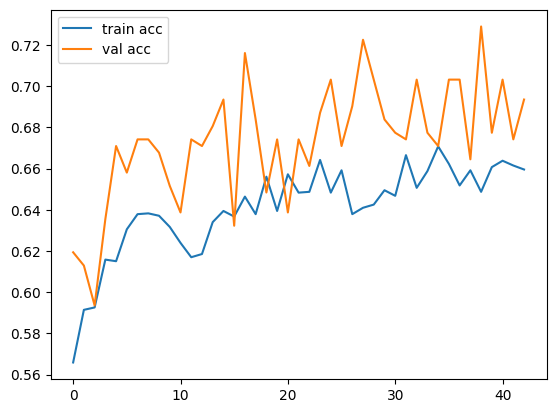

In [20]:
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.close()

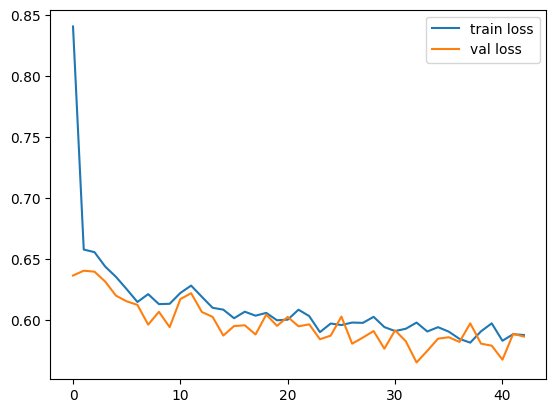

In [18]:
# plot the loss
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.close()

In [21]:
from sklearn.metrics import classification_report

y_pred = model.predict(augmented_test_ds)
y_pred_labels = np.round(y_pred).astype(int)
y_true = np.concatenate([y for _, y in test_ds], axis=0)
report = classification_report(y_true, y_pred_labels)

print(report)

2023-06-02 01:52:37.059280: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 6s 571ms/step
              precision    recall  f1-score   support

           0       0.47      0.36      0.41       150
           1       0.51      0.61      0.55       160

    accuracy                           0.49       310
   macro avg       0.49      0.49      0.48       310
weighted avg       0.49      0.49      0.48       310



2023-06-02 01:52:47.918907: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [310]
	 [[{{node Placeholder/_4}}]]
2023-06-02 01:52:47.919166: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [310]
	 [[{{node Placeholder/_4}}]]


In [22]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_true, y_pred_labels)
f1 = f1_score(y_true, y_pred_labels, average='weighted')

In [23]:
print('Accuracy:', accuracy)
print('F1-Score:', f1)

Accuracy: 0.49032258064516127
F1-Score: 0.482225246001828
